In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("c:/users/quang/Customer-Segmentation/data/processed/cleaned_data.csv")

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Environment Setup:

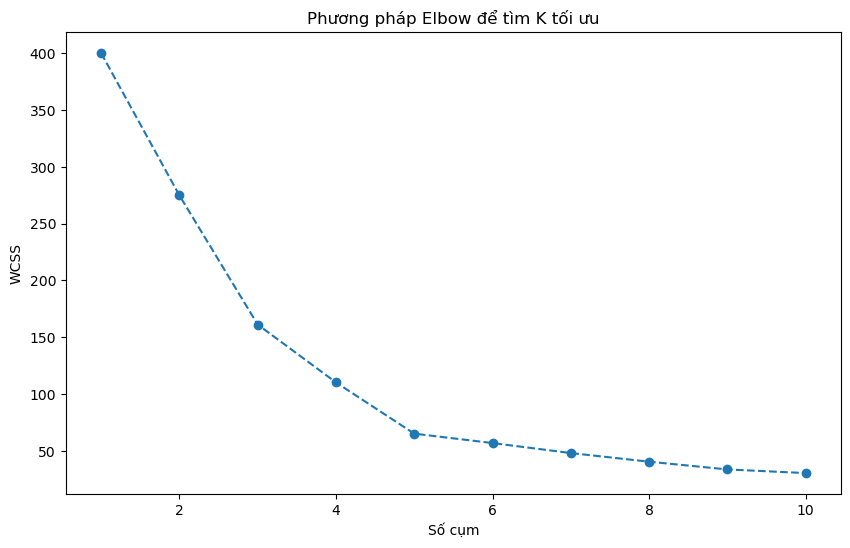

In [96]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=4096, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker="o", linestyle="--")
plt.xlabel("Số cụm")
plt.ylabel("WCSS")
plt.title("Phương pháp Elbow để tìm K tối ưu")
plt.savefig("c:/users/quang/Customer-Segmentation/reports/figures/elbow_method.png")
plt.show()


#### ==> K_mean = 5 là tối ưu

In [98]:
from sklearn.cluster import KMeans

In [102]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

import joblib
joblib.dump(kmeans, "c:/users/quang/Customer-Segmentation/models/kmeans_model.pkl")

C:\Users\Quang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


['c:/users/quang/Customer-Segmentation/models/kmeans_model.pkl']

In [106]:
import seaborn as sns

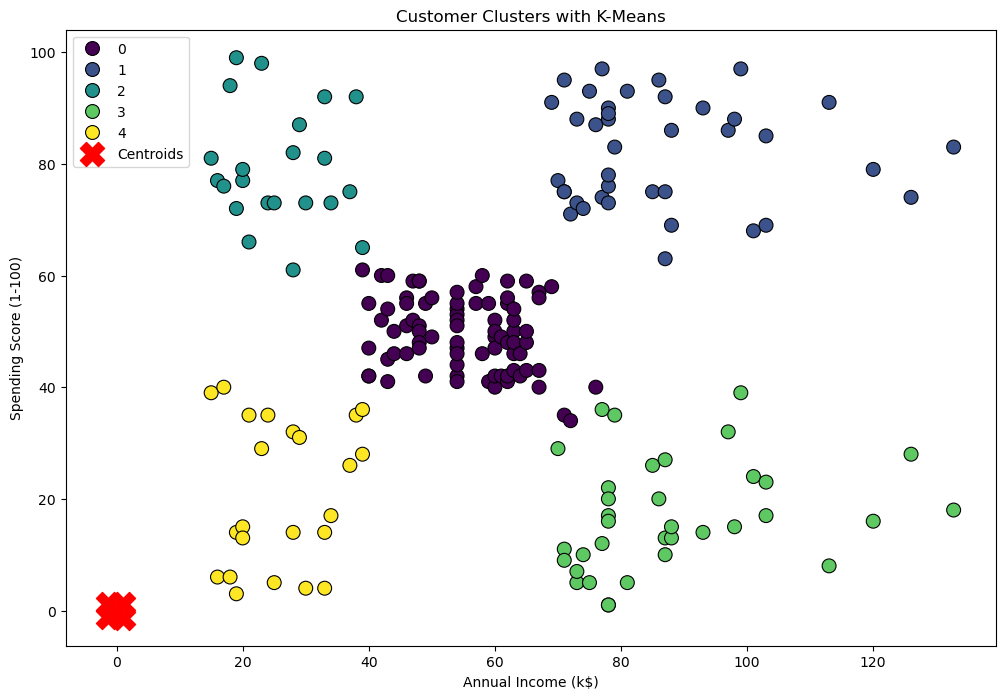

In [110]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="viridis",
    s=100,
    edgecolor="black",
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="red",
    marker="X",
    label="Centroids",
)
plt.title("Customer Clusters with K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.savefig("c:/users/quang/Customer-Segmentation/reports/figures/cluster_visualization.png")
plt.show()

In [116]:
cluster_summary = df.groupby("Cluster").agg({
    "Annual Income (k$)": ["mean", "median", "std"],
    "Spending Score (1-100)": ["mean", "median", "std"],
    "Age": ["mean", "median"]
}).reset_index()

cluster_summary.to_markdown("c:/users/quang/Customer-Segmentation/reports/results/Cluster_analysis/cluster_summary.md")

In [118]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette = silhouette_score(X_scaled, df["Cluster"])
davies = davies_bouldin_score(X_scaled, df["Cluster"])
calinski = calinski_harabasz_score(X_scaled, df["Cluster"])

with open("c:/users/quang/Customer-Segmentation/reports/evaluation_metrics.txt", "w") as f:
    f.write(f"Silhouette Score: {silhouette:.2f}\n")
    f.write(f"Davies-Bouldin Index: {davies:.2f}\n")
    f.write(f"Calinski-Harabasz Index: {calinski:.2f}")

In [124]:
df.to_csv("c:/users/quang/Customer-Segmentation/data/processed/customers_with_clusters.csv", index=False)

In [130]:
df.sort_values(by="Cluster").to_csv("c:/users/quang/Customer-Segmentation/data/processed/customers_with_clusters.csv", index=False)